# This is an example notebook

Example Notebook

In [1]:
import sys
sys.path.append("/home/RUS_CIP/st186635/DeepDrawSimDataset/src/pipelines")
from pytorch import DeepDrawSimDataset, MappingConfig

cfg = MappingConfig(
    mapping_csv="/mnt/data/hsh/mapping_01.csv",
    data_dir="/mnt/data/hsh/data_copy/",
    id_column="new_id",          # 可以保留
    path_column="new_id",        # ✅ 关键：把文件名列当作路径列
    zero_pad=3,
    stage_prefix="Tiefgezogenes Bauteil_"
)
ds = DeepDrawSimDataset(cfg)


In [2]:
# 1) 选文件（按 id/new_id/orig_sim_id/参数等筛选）
files = ds.select_files(new_id="001.h5")   # -> [/.../001.h5]
f = files[0]

In [3]:
# 2) 根属性
attrs = ds.get_root_attrs(f)
print(attrs)

{'Parameters': '{"radii2": 20.0, "radii1": 5.0, "delta": 0.0, "cr": 1.1, "height": 25.0}', 'cr': np.float64(1.1), 'delta': np.float64(0.0), 'height': np.float64(25.0), 'radii1': np.float64(5.0), 'radii2': np.float64(20.0), 'source_tag': 'tool_radii2_20_radii1_5_cr_1.1_delta_0_height_25'}


In [4]:
# 3) 列出 blank 所有阶段
stages = ds.list_blank_stages(f)
print(stages[:11])  # ['Tiefgezogenes Bauteil_15000', ...]

['Tiefgezogenes Bauteil_15000', 'Tiefgezogenes Bauteil_17500', 'Tiefgezogenes Bauteil_20000', 'Tiefgezogenes Bauteil_22500', 'Tiefgezogenes Bauteil_25000', 'Tiefgezogenes Bauteil_27500', 'Tiefgezogenes Bauteil_30000', 'Tiefgezogenes Bauteil_32500', 'Tiefgezogenes Bauteil_35000', 'Tiefgezogenes Bauteil_37500', 'Tiefgezogenes Bauteil_40000']


In [5]:
# 4) faces(E,4)
faces_blank = ds.get_faces(f, part="blank", stage=30000)   # 也可传字符串
faces_die   = ds.get_faces(f, part="die")


NameError: name '_set_equal_aspect_3d' is not defined

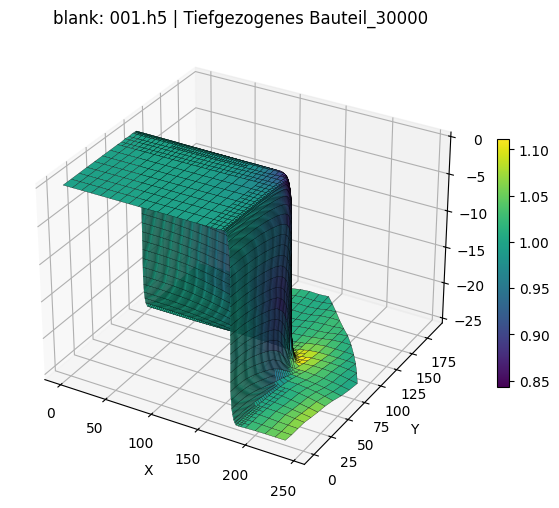

In [6]:
# 5) 可视化
ds.visualize_blank(f, stage=30000)
ds.visualize_tool(f, part="die")